<a href="https://colab.research.google.com/github/abhinavarorags/predict/blob/main/hjb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

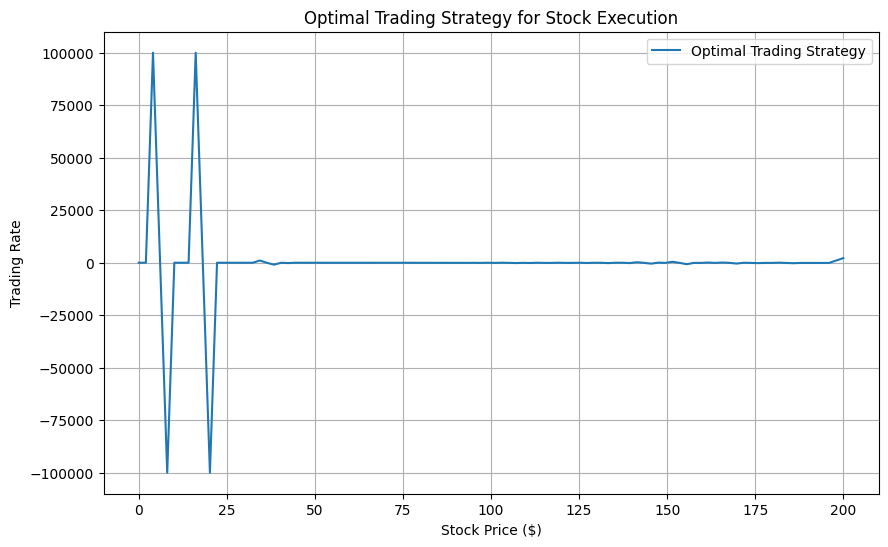

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0  # Time horizon
N = 100  # Number of time steps
M = 100  # Number of price grid points
mu = 0.05  # Expected return
sigma = 0.2  # Volatility
c = 0.01  # Trading cost coefficient
lambda_ = 0.01  # Market impact factor
S_max = 200  # Max stock price
S_min = 0  # Min stock price

# Discretization
dt = T / N
dS = (S_max - S_min) / M
S = np.linspace(S_min, S_max, M)
V = np.zeros((N + 1, M))  # Value function
u_opt = np.zeros((N, M))  # Optimal trading strategy

# Terminal condition (penalty at maturity)
V[-1, :] = -S  # Linear penalty at maturity

# Solve the HJB equation using backward iteration
for t in range(N - 1, -1, -1):
    for i in range(M):
        if i == 0:
            dVdS = (V[t + 1, i + 1] - V[t + 1, i]) / dS
            d2VdS2 = (V[t + 1, i + 2] - 2 * V[t + 1, i + 1] + V[t + 1, i]) / (dS ** 2)
        elif i == M - 1:
            dVdS = (V[t + 1, i] - V[t + 1, i - 1]) / dS
            d2VdS2 = (V[t + 1, i] - 2 * V[t + 1, i - 1] + V[t + 1, i - 2]) / (dS ** 2)
        else:
            dVdS = (V[t + 1, i + 1] - V[t + 1, i - 1]) / (2 * dS)
            d2VdS2 = (V[t + 1, i + 1] - 2 * V[t + 1, i] + V[t + 1, i - 1]) / (dS ** 2)

        # Clamp control to avoid overflow
        u_opt[t, i] = np.clip(-dVdS / (2 * c) - lambda_ * S[i] / (2 * c), -1e5, 1e5)

        # Clamp value function to avoid overflow
        V[t, i] = np.clip(
            V[t + 1, i] + dt * (
                    -u_opt[t, i] * dVdS
                    + c * u_opt[t, i] ** 2
                    + lambda_ * u_opt[t, i] * S[i]
                    + mu * S[i] * dVdS
                    + 0.5 * sigma ** 2 * S[i] ** 2 * d2VdS2
            ),
            -1e5, 1e5
        )

# Plot the optimal strategy
plt.figure(figsize=(10, 6))
plt.plot(S, u_opt[0, :], label='Optimal Trading Strategy')
plt.title('Optimal Trading Strategy for Stock Execution')
plt.xlabel('Stock Price ($)')
plt.ylabel('Trading Rate')
plt.legend()
plt.grid(True)
plt.show()